# Private Credit and Stock Markets

Lets start by analysing the performance of Private Credits.  Well, they did show how it is the best fixed income performance for many, many, many years!

## Variable Setup

In [1]:
varStartYear = 2007
varEndYear = 2022

![](PrivateCredit.png)

## Create the Private Credits Dataframe

<Axes: title={'center': 'Private Credit'}>

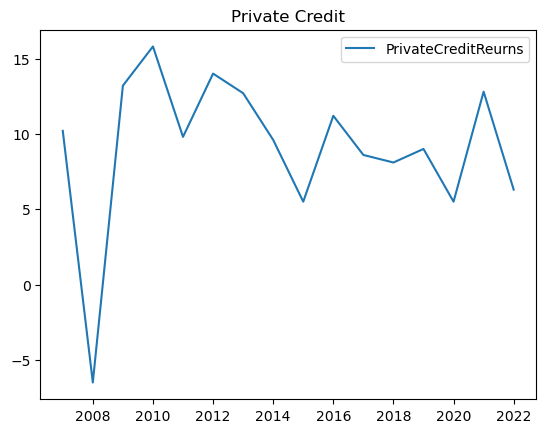

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a DataFrame with a specified index
arr_private_credit = {
    'PrivateCreditReurns': [10.2, -6.5, 13.2, 15.8, 9.8, 14.0, 12.7, 9.6, 5.5, 11.2, 8.6, 8.1, 9.0, 5.5, 12.8, 6.3]
}

arr_index_values =  list(range(varStartYear, varEndYear+1))

df_private_credit = pd.DataFrame(arr_private_credit, index=arr_index_values)
df_private_credit.plot(title='Private Credit')

## Create the SnP Dataframe

<Axes: title={'center': 'SnP500'}, xlabel='Year'>

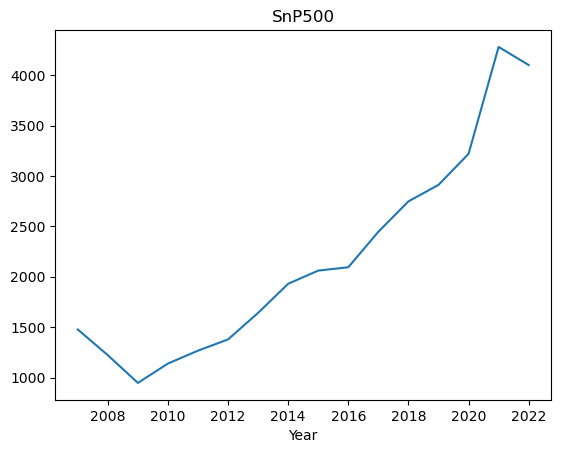

In [3]:
df_snp = pd.read_csv('../Data/US/1_Markets/markets_historical_spx_ind.csv', encoding='utf-16')
df_snp['Date'] = pd.to_datetime(df_snp['Date'], format='%d/%m/%Y')


# Extract the year from the datetime column
df_snp['Year'] = df_snp['Date'].dt.year
df_snp_year = df_snp.groupby('Year')['Open'].mean()
 
    
    
df_snp_year = df_snp_year[(df_snp_year.index >= varStartYear) & (df_snp_year.index<=varEndYear)] 
df_snp_year.plot(title='SnP500')


## Create the Interest Rate Dataframe

<Axes: title={'center': 'Interest Rates'}, xlabel='Year'>

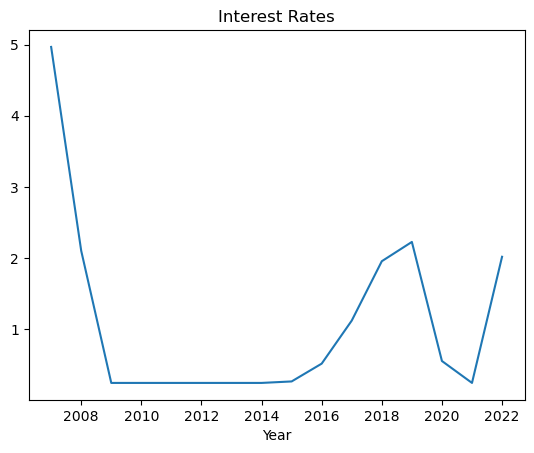

In [4]:
df_ir = pd.read_csv('../Data/US/2_Money/historical_country_United_States_indicator_Interest_Rate.csv')

df_ir['Date'] = pd.to_datetime(df_ir['DateTime'], format="%Y-%m-%dT%H:%M:%S")

df_ir

# Extract the year from the datetime column
df_ir['Year'] = df_ir['Date'].dt.year
df_ir_year = df_ir.groupby('Year')['Value'].mean()
 
df_ir_year = df_ir_year[(df_ir_year.index >= varStartYear) & (df_ir_year.index <= varEndYear)] 
df_ir_year.plot(title='Interest Rates')

## Combining All Together

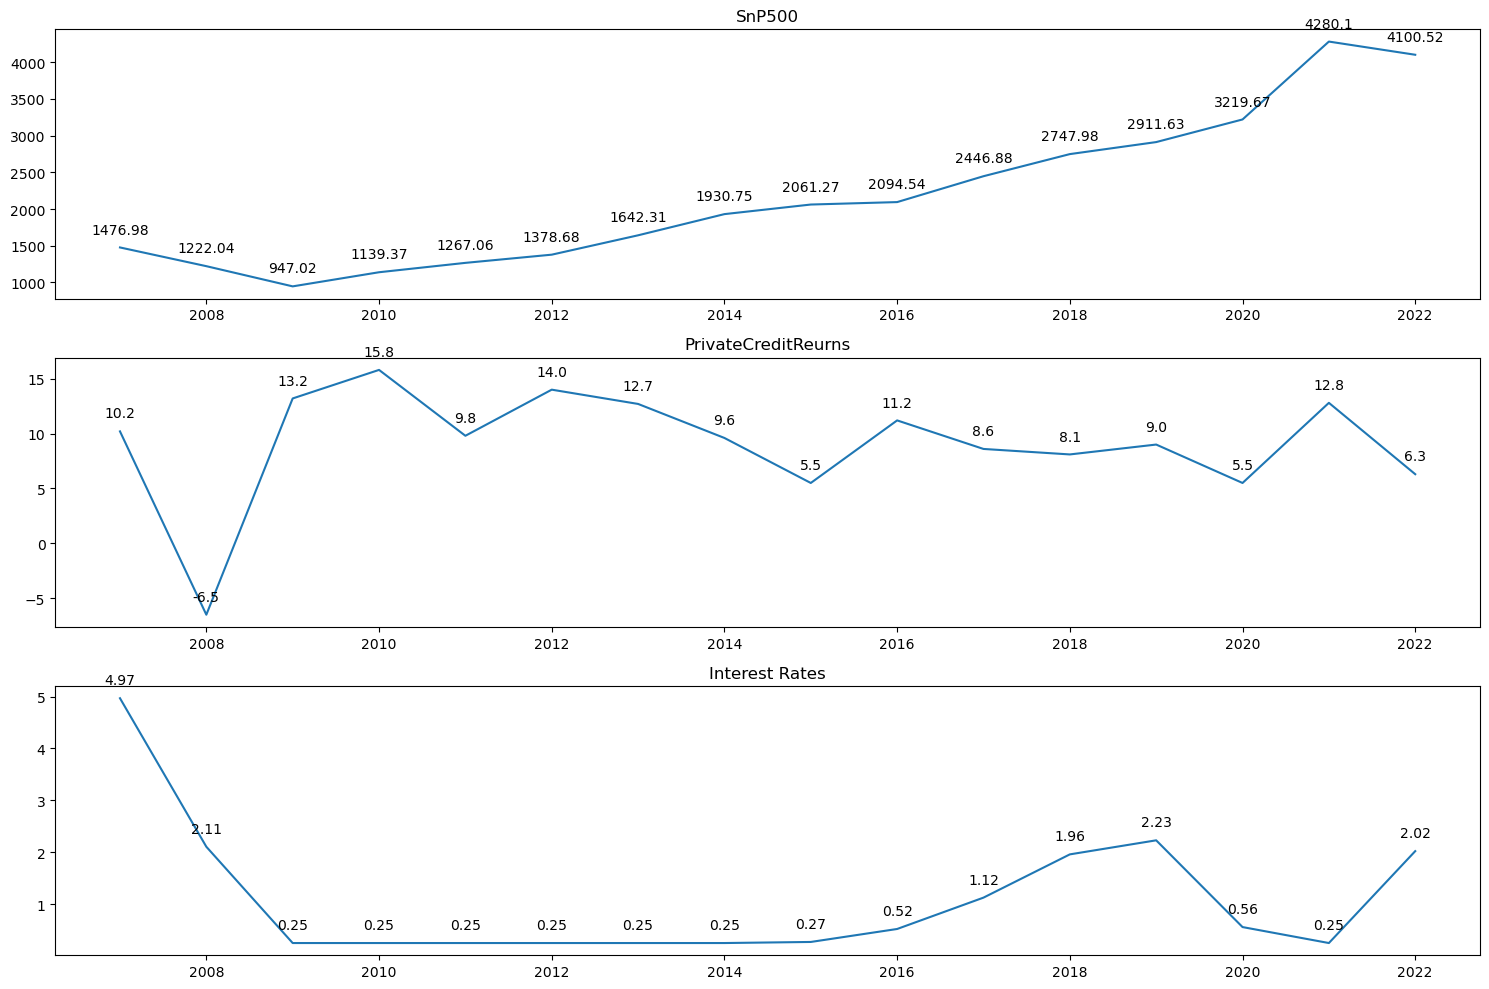

In [5]:
combined_df = pd.concat([df_snp_year, df_private_credit, df_ir_year], axis=1)

combined_df.rename(columns={'Open':'SnP500'}, inplace=True)
combined_df.rename(columns={'Value':'Interest Rates'}, inplace=True)


# Get the column names
column_names = combined_df.columns

# Create subplots
num_columns = len(column_names)
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(15, 10))  # 1 row, n columns

# Loop through columns and plot on each subplot
for i, column in enumerate(column_names):
    axes[i].plot(combined_df[column])
    
    
    # Annotate each point with its value
    for j, value in combined_df[column].items():
        
        value = round(value, 2)
        axes[i].annotate(str(value), (j, value), textcoords="offset points", xytext=(0,10), ha='center')    
    
    axes[i].set_title(column)
    
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()